# ......................................... RAWPOLLS PREDICTION .........................................

<div class="alert alert-block alert-info">
<b>Importing libraries</b> </div>


In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b>Loading the dataset</b> </div>


In [7]:
df = pd.read_excel('RAW POLLS.xlsx')
df.columns

Index(['pollno', 'race', 'year', 'location', 'type_simple', 'type_detail',
       'pollster', 'partisan', 'polldate', 'samplesize', 'cand1_name',
       'cand1_pct', 'cand2_name', 'cand2_pct', 'cand3_pct', 'margin_poll',
       'electiondate', 'cand1_actual', 'cand2_actual', 'margin_actual',
       'error', 'bias', 'rightcall', 'comment', 'Number'],
      dtype='object')

In [8]:
df.head(5)

,pollno,race,year,location,type_simple,type_detail,pollster,partisan,polldate,samplesize,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,comment,Number
0,5380001,1998_House-G_ID-1,1998,ID-1,House-G,House-G,Garin-Hart-Yang Research Group,D,10/13/98,372.0,...,2.0,1998-03-11 00:00:00,44.73,55.27,-10.54,12.54,12.54,0.0,None,1
1,5380002,1998_House-G_ID-2,1998,ID-2,House-G,House-G,Garin-Hart-Yang Research Group,D,10/13/98,400.0,...,6.0,1998-03-11 00:00:00,44.69,52.51,-7.82,13.82,13.82,0.0,None,1
2,5380003,1998_House-G_US,1998,US,House-G,House-G,Zogby Interactive/JZ Analytics,None,10/13/98,864.0,...,3.0,1998-03-11 00:00:00,46.42,47.99,-1.57,4.57,4.57,0.0,"previously listed as Zogby Analytics, telephone",1
3,5380004,1998_Sen-G_NV,1998,NV,Sen-G,Sen-G,"Fairbank, Maslin, Maullin, Metz & Associates",D,10/13/98,1418.0,...,5.0,1998-03-11 00:00:00,47.88,47.78,0.10,4.90,4.9,1.0,None,1
4,5380005,1998_Sen-G_NY,1998,NY,Sen-G,Sen-G,Blum & Weprin Associates,None,10/13/98,364.0,...,-8.0,1998-03-11 00:00:00,54.62,44.08,10.54,18.54,-18.54,0.0,None,1


<div class="alert alert-block alert-info">
<b>To display shape of dataset</b> </div>


In [9]:
df.shape

(23103, 25)

<div class="alert alert-block alert-info">
<b>To display columns,datatype, Null values </b> </div>


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23103 entries, 0 to 23102
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pollno         23103 non-null  int64  
 1   race           23103 non-null  object 
 2   year           23103 non-null  int64  
 3   location       23103 non-null  object 
 4   type_simple    23103 non-null  object 
 5   type_detail    23103 non-null  object 
 6   pollster       23103 non-null  object 
 7   partisan       23103 non-null  object 
 8   polldate       23103 non-null  object 
 9   samplesize     23103 non-null  float64
 10  cand1_name     23103 non-null  object 
 11  cand1_pct      23103 non-null  float64
 12  cand2_name     23103 non-null  object 
 13  cand2_pct      23103 non-null  float64
 14  cand3_pct      23103 non-null  object 
 15  margin_poll    23103 non-null  float64
 16  electiondate   23103 non-null  object 
 17  cand1_actual   23103 non-null  float64
 18  cand2_

<div class="alert alert-block alert-danger">
<b>Preprocessing  :-</b> </div>

<div class="alert alert-block alert-info">
<b>Splitting polldate into separate columns</b> </div>

In [11]:
df['polldate']=pd.to_datetime(df['polldate'])
df['Month_poll']=df['polldate'].dt.month
df['Date_poll']=df['polldate'].dt.day
df['Year_poll']=df['polldate'].dt.year

<div class="alert alert-block alert-info">
<b>Splitting electiondate into separate columns</b> </div>

In [12]:
df['electiondate']=pd.to_datetime(df['electiondate'])
df['Month_ele']=df['electiondate'].dt.month
df['Date_ele']=df['electiondate'].dt.day
df['Year_ele']=df['electiondate'].dt.year


<div class="alert alert-block alert-info">
<b>Dropping this extra columns</b> </div>

In [13]:
df.drop(['polldate','electiondate','pollno'],axis=1,inplace=True)

In [14]:
df.replace('None',np.nan,inplace = True)

<div class="alert alert-block alert-info">
<b>Checking Null Values</b> </div>

In [15]:
df.isnull().sum()

race                 0
year                 0
location             0
type_simple          0
type_detail          0
pollster             0
partisan         22223
samplesize           0
cand1_name           0
cand1_pct            0
cand2_name           0
cand2_pct            0
cand3_pct        16814
margin_poll          0
cand1_actual         0
cand2_actual         0
margin_actual        0
error                0
bias              4748
rightcall            0
comment          20396
Number               0
Month_poll           0
Date_poll            0
Year_poll            0
Month_ele            0
Date_ele             0
Year_ele             0
dtype: int64

<div class="alert alert-block alert-info">
<b>

Handling Null Values In Numeric data variable :-
    
cand3_pct has 16814 null values, empty cells replacing with the 0

bias has 4748 null values, empty cells replacing with the 0

rightcall has 16814 null values. empty cells replacing with the 0

</b>



</div>

In [16]:
df['cand3_pct']=df['cand3_pct'].fillna(value='0')
df['bias']=df['bias'].fillna(value='0')

<div class="alert alert-block alert-info">
<b>Checking Unique values  :- </b> </div>

In [17]:
df['cand3_pct'].unique()

array(['0', 7.0, 5.0, 15.0, 12.0, 10.0, 8.0, 6.0, 3.0, 11.0, 16.0, 2.0,
       13.0, 14.0, 17.0, 4.0, 31.0, 1.0, 9.0, 3.1, 1.9, 22.0, 23.0, 19.0,
       21.0, 18.0, 2.7, 29.0, 30.0, 28.0, 24.0, 20.0, 27.0, 25.0, 26.0,
       0.2, 0.3, 0.4, 1.1, 0.1, 0.7, 0.5, 0.0, 0.9, 34.0, 33.0, 32.0,
       25.5, 31.03, 36.0, 26.2, 37.0, 38.0, 35.0, 2.6, 3.8, 3.9, 6.03,
       3.3, 4.1, 2.4, 14.1, 13.4, 2.9, 18.6, 19.4, 14.6, 15.5, 13.94,
       15.54, 15.82, 17.52, 18.7, 14.76, 15.25, 21.21, 20.74, 19.5, 16.3,
       15.1, 16.56, 18.14, 23.04, 18.41, 18.2, 17.1, 20.8, 29.4, 21.4,
       13.3, 14.3, 19.2, 4.5, 2.8, 4.8, 6.6, 3.4, 3.5, 7.7, 6.37, 8.1,
       5.05, 7.6, 1.89, 6.3, 2.3, 4.4, 5.6, 4.3, 2.96, 6.18, 5.9, 2.17,
       3.59, 5.3, 5.8, 5.4, 4.9, 3.7, 27.6, 6.8, 2.2, 5.04, 3.2, 1.2,
       2.58, 5.1, 5.46, 24.52, 2.43, 2.89, 7.1, 15.96, 8.6, 11.3, 15.2,
       16.6, 1.8, 1.44], dtype=object)

In [18]:
df['bias'].unique()

array([12.54, 13.82, 4.57, ..., 0.094859918, -1.556601138, -8.156601138],
      dtype=object)

In [19]:
df['partisan'].unique()

array(['D', nan, 'R', 'I'], dtype=object)


<div class="alert alert-block alert-info">
<b>

Handling Null Values In categorical data variable :-

partisan has 22223 null values. Data is like  'D','R' & 'I'. empty cells replacing with the Neutral


</b>

</div>







In [20]:
df['partisan'] = df['partisan'].fillna(value='Neutral')

In [21]:
df['partisan'].unique()

array(['D', 'Neutral', 'R', 'I'], dtype=object)

In [22]:
df['rightcall']=df['rightcall'].fillna(value='0')

df['rightcall'].unique()

In [23]:
df['rightcall'].replace(0.5,2, inplace=True)

In [24]:
df['rightcall'] = df['rightcall'].astype('int')

In [25]:
df['rightcall'].unique()

array([0, 1, 2])

<div class="alert alert-block alert-info">
<b>

LABEL ENCODIING  --> 



</b> Coverting categorical variables to numeric¶ </div>

In [26]:
columns=['race','location','type_simple','type_detail','pollster','partisan','cand1_name','cand2_name']
       
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    df[i]=le.fit_transform(df[i])

In [27]:
df['rightcall'].unique()

array([0, 1, 2])

### Seperating Data as independent and dependent columns

<div class="alert alert-block alert-info">
<b>Seperating Data as INDEPENDENT & DEPENDENT columns</b> </div>

In [28]:
df.columns

Index(['race', 'year', 'location', 'type_simple', 'type_detail', 'pollster',
       'partisan', 'samplesize', 'cand1_name', 'cand1_pct', 'cand2_name',
       'cand2_pct', 'cand3_pct', 'margin_poll', 'cand1_actual', 'cand2_actual',
       'margin_actual', 'error', 'bias', 'rightcall', 'comment', 'Number',
       'Month_poll', 'Date_poll', 'Year_poll', 'Month_ele', 'Date_ele',
       'Year_ele'],
      dtype='object')

In [29]:
x = df.loc[:, ['race', 'year', 'location', 'type_simple', 'type_detail', 'pollster',
       'samplesize', 'cand1_name', 'cand1_pct', 'cand2_name',
       'cand2_pct', 'margin_poll', 'cand1_actual', 'cand2_actual',
        'error', 'Number',
       'Month_poll', 'Date_poll', 'Year_poll', 'Month_ele', 'Date_ele',
       'Year_ele']]

Y = df['rightcall']

<div class="alert alert-block alert-success">
<b>TARGET VARIABLE  -->  </b> Here our target variable is 'RightCall' </div>


<div class="alert alert-block alert-info">
<b>Standardizing the data</b> </div>

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

<div class="alert alert-block alert-info">
<b>Splitting the data for training and testing</b> </div>

In [31]:
# minimum 70% data has to given for training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

<div class="alert alert-block alert-info">
<b>To check Training & Testing shape</b> </div>

In [32]:
print("Training shape",x_train.shape)
print("Testing shape",x_test.shape)

Training shape (16172, 22)
Testing shape (6931, 22)


<div class="alert alert-block alert-danger">
<b>.......................................................................................... GRADIENT BOOST CLASSIFIER ........................................................................................</b> </div>


<div class="alert alert-block alert-info">
<b>STEP 1. Import Modal GradientBoost: -</b> </div>


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

<div class="alert alert-block alert-info">
<b>STEP 2.Training model</b> </div>


In [36]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier()

<div class="alert alert-block alert-info">
<b>STEP 3. import accuracy_score</b> </div>


In [37]:
from sklearn.metrics import accuracy_score

<div class="alert alert-block alert-info">
<b>STEP 4. Prediction / Testing / Evaluation</b> </div>


In [38]:
print("training accuracy:",accuracy_score(y_train,gb_model.predict(x_train)))
print("testing accuracy:",accuracy_score(y_test,gb_model.predict(x_test)))


training accuracy: 0.9919614147909968
testing accuracy: 0.9916317991631799


<div class="alert alert-block alert-success">
<b>

Training Accuracy:-----> 99%
    
Testing Accuracy:-----> 99%
    
So we got Modarate Best Result from GradientBoostingClassifier Machine Learning Model.

</b> </div>


<div class="alert alert-block alert-warning">
<b>LET US CHECK WITH CONFUSION MATRIX & CLASSIFICATION REPORT</b>
</div>

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
confusion_matrix(y_test,gb_model.predict(x_test))

array([[1055,   29,    1],
       [  28, 5577,    0],
       [   0,    0,  241]], dtype=int64)

<div class="alert alert-block alert-success">
<b>From this "confusion_matrix" TRUE POSSITIVE (Sensitivity) & TRUE NEGATIVE RATE (Specificity) are good</b> </div>


In [41]:
print(classification_report(y_test,gb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1085
           1       0.99      1.00      0.99      5605
           2       1.00      1.00      1.00       241

    accuracy                           0.99      6931
   macro avg       0.99      0.99      0.99      6931
weighted avg       0.99      0.99      0.99      6931



<div class="alert alert-block alert-info">
<b>Checking with remaining Machine Learning Models.</b> </div>


<div class="alert alert-block alert-success">
<b>

LogisticRegression:-

Training Accuracy:-----> 79%

Testing Accuracy:-----> 80%
    
</b> 

Here we got slight underfit result from Training & Testing Accuracy of LogisticRegression Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

DecisionTreeClassifier:-

Training Accuracy:-----> 100%

Testing Accuracy:-----> 99%
    
</b> 

Here we got slight Overfitting result from Training & Testing Accuracy of DecisionTreeClassifier Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

RandomForestClassifier:-

Training Accuracy:-----> 100%

Testing Accuracy:-----> 90%
    
</b> 

Here we got slight Overfitting result from Training & Testing Accuracy of RandomForestClassifier Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

SupportVectorClassifier:-

Training Accuracy:-----> 90%

Testing Accuracy:-----> 90%
    
</b> 

Here we got modarate less result from Training & Testing Accuracy of SupportVectorClassifier Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

KNeighborsClassifier:-

Training Accuracy:-----> 92%

Testing Accuracy:-----> 89%
    
</b> 

Here we got Overfitting result from Training & Testing Accuracy of KNeighborsClassifier Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

AdaBoostClassifier:-

Training Accuracy:-----> 82%

Testing Accuracy:-----> 82%
    
</b> 

Here we got modarate less result from Training & Testing Accuracy of AdaBoostClassifier Machine Learning Model.

</div>


<div class="alert alert-block alert-success">
<b>

XGBClassifier:-

Training Accuracy:-----> 100%

Testing Accuracy:-----> 99%
    
</b> 

Here we got slight Overfitting result from Training & Testing Accuracy of XGBClassifier Machine Learning Model.

</div>


<div class="alert alert-block alert-warning">
<b>PLOTTINGS FOR "TRAINING ACURACY & TESTING ACURACY"</b>
</div>

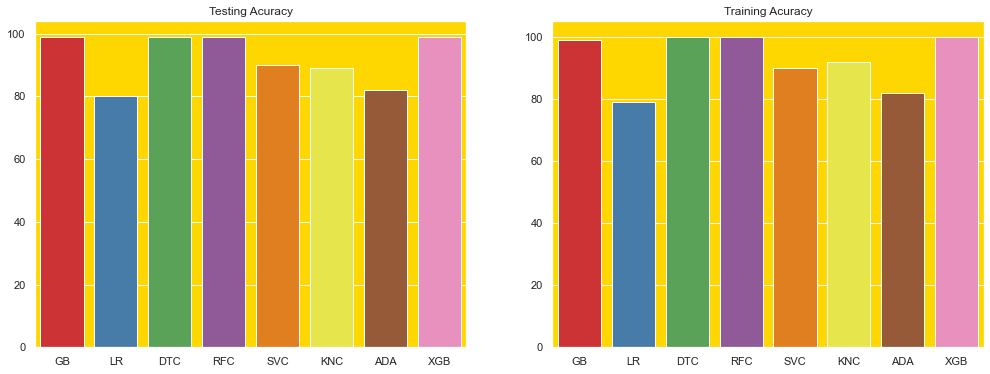

In [70]:
sns.set(rc={'axes.facecolor':'gold', 'figure.facecolor':'w'})
fig, axes = plt.subplots(1,2,figsize=(17,6))
fig,axes[0].set_title('Testing Acuracy')
fig,axes[1].set_title('Training Acuracy')

X = ["GB","LR","DTC","RFC","SVC","KNC","ADA","XGB"]
Y = [99,80,99,99,90,89,82,99] 

B = [99,79,100,100,90,92,82,100]
sns.barplot(x=X,y=Y,ax =axes[0],palette="Set1")
sns.barplot(x=X,y=B,ax = axes[1],palette="Set1")


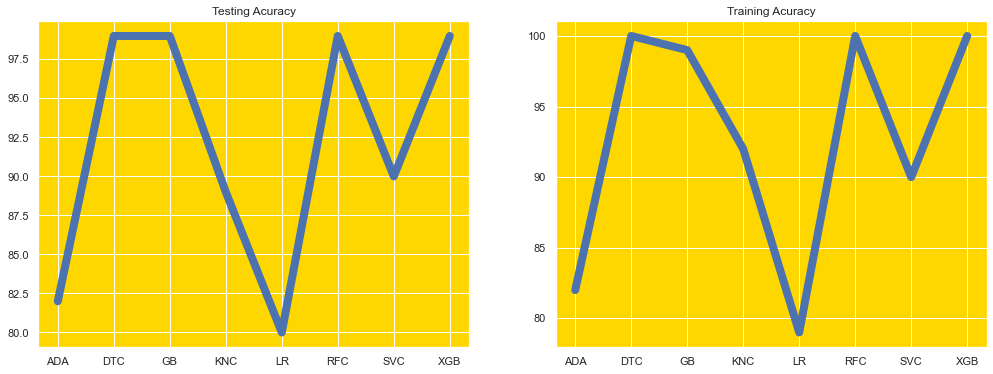

In [71]:
sns.set(rc={'axes.facecolor':'gold', 'figure.facecolor':'w'})
fig, axes = plt.subplots(1,2,figsize=(17,6))
fig,axes[0].set_title('Testing Acuracy')
fig,axes[1].set_title('Training Acuracy')

X = ["GB","LR","DTC","RFC","SVC","KNC","ADA","XGB"]
Y = [99,80,99,99,90,89,82,99] 

B = [99,79,100,100,90,92,82,100]
sns.lineplot(x=X,y=Y,ax =axes[0],markers=True, dashes=True,palette="Set1", lw=8,markersize=10)
sns.lineplot(x=X,y=B,ax = axes[1],markers=True, dashes=True,palette="Set1", lw=8,markersize=10)
